In [109]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
df = pd.read_csv('dataset/seoul_pm10.csv', encoding='cp949')

In [111]:
df.head()

,date,area,pm10,pm2.5
0,2022-12-31 23:00,강남구,57.0,44.0
1,2022-12-31 23:00,강동구,68.0,55.0
2,2022-12-31 23:00,강북구,59.0,42.0
3,2022-12-31 23:00,강서구,62.0,40.0
4,2022-12-31 23:00,관악구,57.0,38.0


In [112]:
df_pm10 = df.drop('pm2.5', axis=1)
df_pm25 = df.drop('pm10', axis=1)

In [113]:
df_pm10.head()

,date,area,pm10
0,2022-12-31 23:00,강남구,57.0
1,2022-12-31 23:00,강동구,68.0
2,2022-12-31 23:00,강북구,59.0
3,2022-12-31 23:00,강서구,62.0
4,2022-12-31 23:00,관악구,57.0


In [114]:
df_pm25.head()

,date,area,pm2.5
0,2022-12-31 23:00,강남구,44.0
1,2022-12-31 23:00,강동구,55.0
2,2022-12-31 23:00,강북구,42.0
3,2022-12-31 23:00,강서구,40.0
4,2022-12-31 23:00,관악구,38.0


In [116]:
print(df['area'].unique())
len(df['area'].unique())

['강남구' '강동구' '강북구' '강서구' '관악구' '광진구' '구로구' '금천구' '노원구' '도봉구' '동대문구' '동작구'
 '마포구' '서대문구' '서초구' '성동구' '성북구' '송파구' '양천구' '영등포구' '용산구' '은평구' '종로구' '중구'
 '중랑구' '평균']


26

In [117]:
# 피벗 테이블 생성
pm10_pivot = df_pm10.pivot_table(index='date', columns='area', values='pm10')
pm25_pivot = df_pm25.pivot_table(index='date', columns='area', values='pm2.5')

In [118]:
pm10_pivot.to_csv('dataset/seoul_pm10_filtered.csv')
pm25_pivot.to_csv('dataset/seoul_pm25_filtered.csv')

### 서울시 지역별 미세먼지 분석

In [160]:
# 폰트지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
diabetes = pd.read_csv('./dataset/diabetes.csv')

### 데이터 불러오기

In [161]:
df = pd.read_csv('dataset/seoul_pm10_filtered.csv')

### 데이터셋 확인

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    8760 non-null   object 
 1   강남구     8685 non-null   float64
 2   강동구     8577 non-null   float64
 3   강북구     8659 non-null   float64
 4   강서구     8662 non-null   float64
 5   관악구     8582 non-null   float64
 6   광진구     8673 non-null   float64
 7   구로구     8517 non-null   float64
 8   금천구     8537 non-null   float64
 9   노원구     8637 non-null   float64
 10  도봉구     8615 non-null   float64
 11  동대문구    8121 non-null   float64
 12  동작구     8600 non-null   float64
 13  마포구     8640 non-null   float64
 14  서대문구    8528 non-null   float64
 15  서초구     8362 non-null   float64
 16  성동구     8660 non-null   float64
 17  성북구     8611 non-null   float64
 18  송파구     8570 non-null   float64
 19  양천구     8617 non-null   float64
 20  영등포구    8692 non-null   float64
 21  용산구     8625 non-null   float64
 22  

In [163]:
df.dtypes

date     object
강남구     float64
강동구     float64
강북구     float64
강서구     float64
관악구     float64
광진구     float64
구로구     float64
금천구     float64
노원구     float64
도봉구     float64
동대문구    float64
동작구     float64
마포구     float64
서대문구    float64
서초구     float64
성동구     float64
성북구     float64
송파구     float64
양천구     float64
영등포구    float64
용산구     float64
은평구     float64
종로구     float64
중구      float64
중랑구     float64
평균      float64
dtype: object

### 데이터 전처리

In [164]:
df['date'] = pd.to_datetime(df['date'])

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    8760 non-null   datetime64[ns]
 1   강남구     8685 non-null   float64       
 2   강동구     8577 non-null   float64       
 3   강북구     8659 non-null   float64       
 4   강서구     8662 non-null   float64       
 5   관악구     8582 non-null   float64       
 6   광진구     8673 non-null   float64       
 7   구로구     8517 non-null   float64       
 8   금천구     8537 non-null   float64       
 9   노원구     8637 non-null   float64       
 10  도봉구     8615 non-null   float64       
 11  동대문구    8121 non-null   float64       
 12  동작구     8600 non-null   float64       
 13  마포구     8640 non-null   float64       
 14  서대문구    8528 non-null   float64       
 15  서초구     8362 non-null   float64       
 16  성동구     8660 non-null   float64       
 17  성북구     8611 non-null   float64       
 18  송파구     

In [166]:
df.isna().sum()

date      0
강남구      75
강동구     183
강북구     101
강서구      98
관악구     178
광진구      87
구로구     243
금천구     223
노원구     123
도봉구     145
동대문구    639
동작구     160
마포구     120
서대문구    232
서초구     398
성동구     100
성북구     149
송파구     190
양천구     143
영등포구     68
용산구     135
은평구     747
종로구     156
중구      139
중랑구      84
평균        1
dtype: int64

In [167]:
for column in df.columns[1:]:
    df[column] = df[column].fillna(df[column].mean())

In [168]:
df.isna().sum()

date    0
강남구     0
강동구     0
강북구     0
강서구     0
관악구     0
광진구     0
구로구     0
금천구     0
노원구     0
도봉구     0
동대문구    0
동작구     0
마포구     0
서대문구    0
서초구     0
성동구     0
성북구     0
송파구     0
양천구     0
영등포구    0
용산구     0
은평구     0
종로구     0
중구      0
중랑구     0
평균      0
dtype: int64

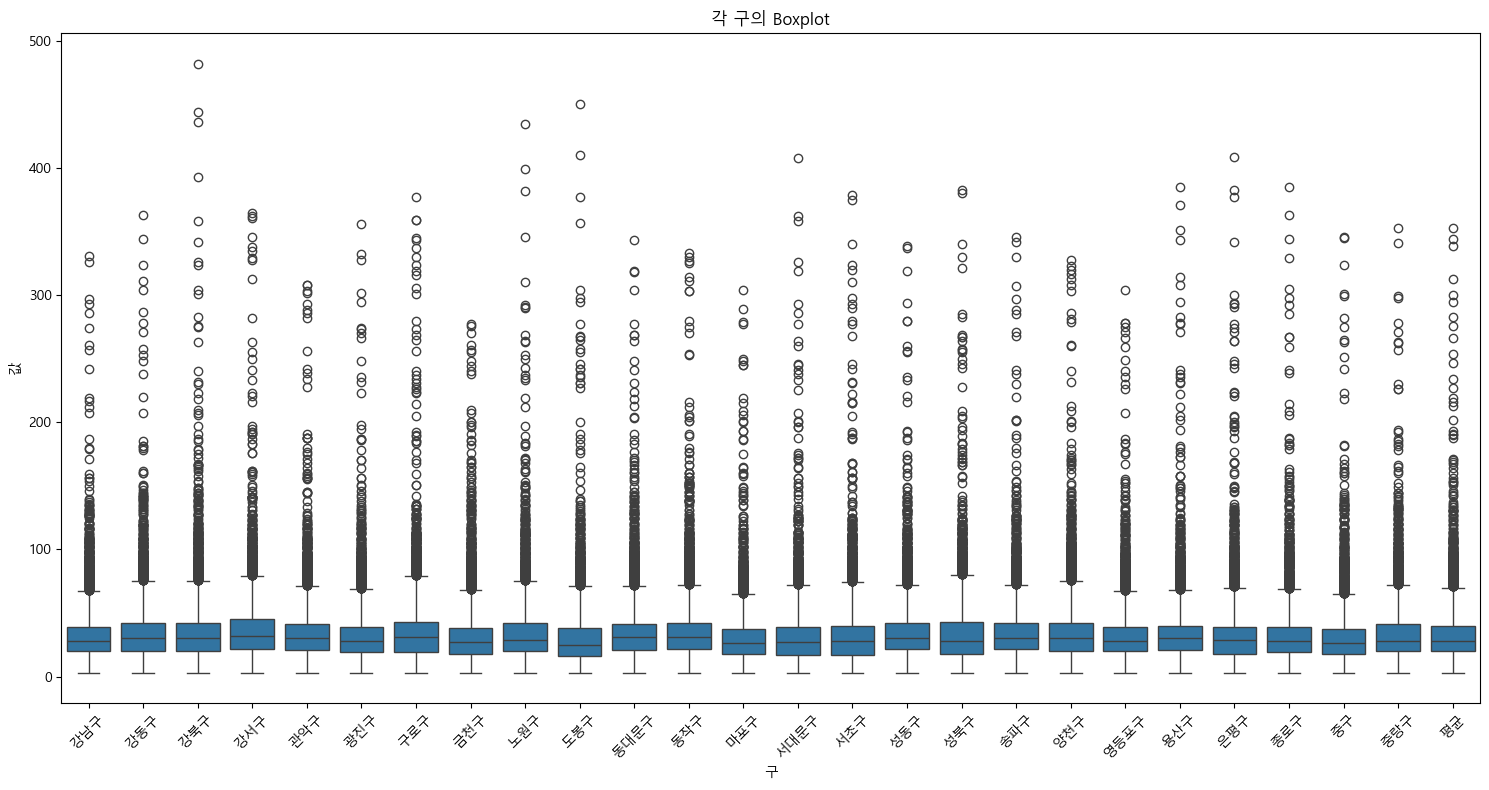

In [169]:
# 이상치 확인
df_melted = df.melt(id_vars='date', value_vars=df.columns[1:], var_name='구', value_name='값')

# boxplot 생성
plt.figure(figsize=(15, 8))
sns.boxplot(x='구', y='값', data=df_melted)
plt.xticks(rotation=45)
plt.title('각 구의 Boxplot')
plt.xlabel('구')
plt.ylabel('값')
plt.tight_layout()
plt.show()

In [170]:
# IQR 기반 클리핑 함수 정의
def process_outliers_with_clipping(df, column):
    Q1 = df[column].quantile(0.25)  # 1사분위 값
    Q3 = df[column].quantile(0.75)  # 3사분위 값
    IQR = Q3 - Q1                   # IQR 계산
    lower_bound = Q1 - 1.5 * IQR    # 하한값
    upper_bound = Q3 + 1.5 * IQR    # 상한값
    
    # 클리핑 적용: 하한값 미만은 하한값으로, 상한값 초과는 상한값으로 조정
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# 26개 지역 컬럼에 대해 클리핑 적용
for column in df.columns:
    process_outliers_with_clipping(df, column)

# 처리 결과 확인
print(df.head())

                 date   강남구   강동구   강북구   강서구  ...   은평구   종로구    중구   중랑구    평균
0 2022-01-01 00:00:00  18.0  22.0  20.0  22.0  ...  19.0  20.0  20.0  21.0  20.0
1 2022-01-01 10:00:00  21.0  25.0  29.0  24.0  ...  21.0  22.0  24.0  23.0  24.0
2 2022-01-01 11:00:00  20.0  22.0  42.0  28.0  ...  21.0  22.0  26.0  22.0  26.0
3 2022-01-01 12:00:00  19.0  29.0  34.0  24.0  ...  23.0  22.0  23.0  23.0  25.0
4 2022-01-01 13:00:00  24.0  29.0  31.0  31.0  ...  24.0  28.0  29.0  30.0  28.0

[5 rows x 27 columns]


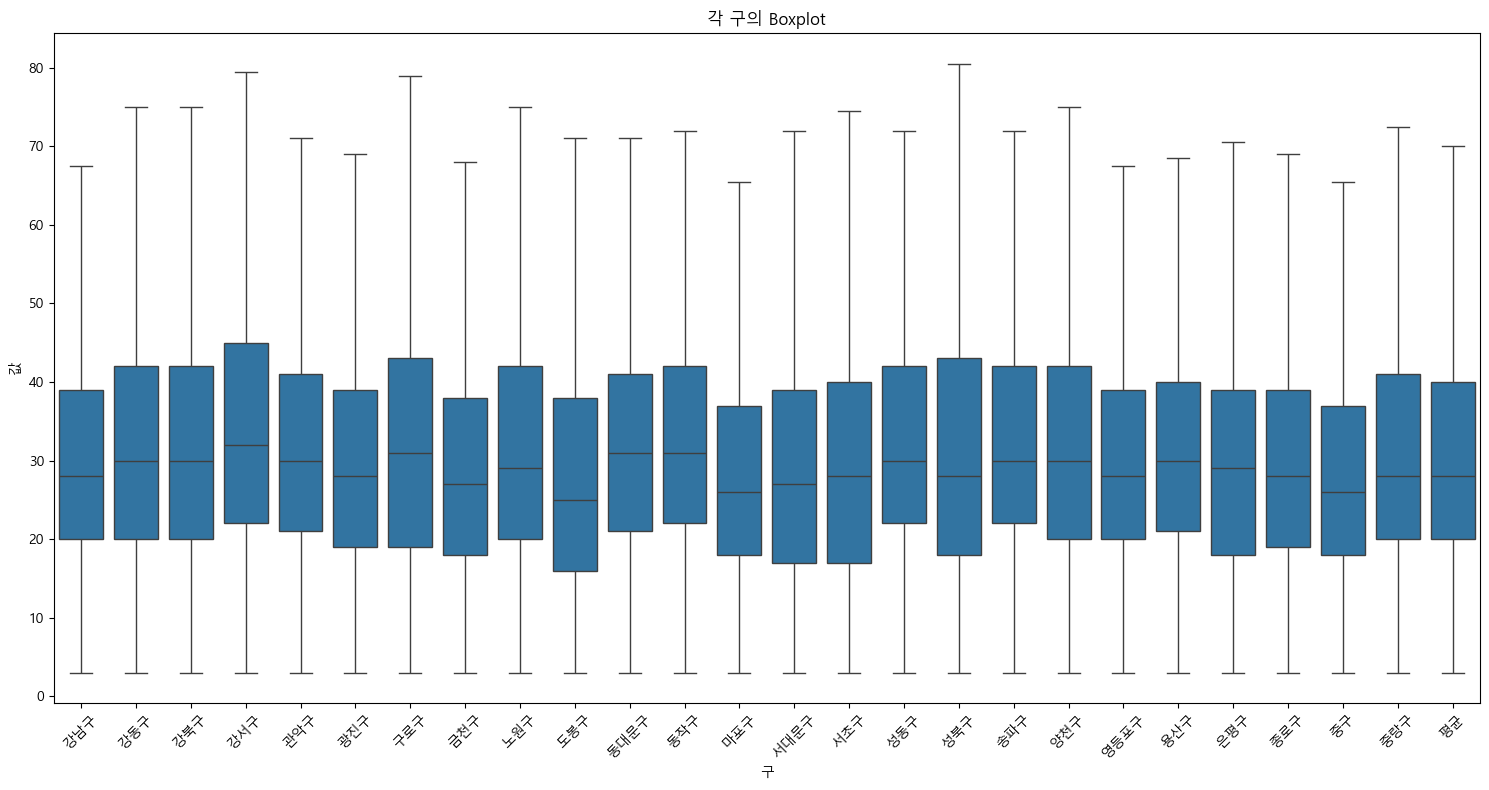

In [171]:
# 이상치 확인
df_melted = df.melt(id_vars='date', value_vars=df.columns[1:], var_name='구', value_name='값')

# boxplot 생성
plt.figure(figsize=(15, 8))
sns.boxplot(x='구', y='값', data=df_melted)
plt.xticks(rotation=45)
plt.title('각 구의 Boxplot')
plt.xlabel('구')
plt.ylabel('값')
plt.tight_layout()
plt.show()

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    8760 non-null   datetime64[ns]
 1   강남구     8760 non-null   float64       
 2   강동구     8760 non-null   float64       
 3   강북구     8760 non-null   float64       
 4   강서구     8760 non-null   float64       
 5   관악구     8760 non-null   float64       
 6   광진구     8760 non-null   float64       
 7   구로구     8760 non-null   float64       
 8   금천구     8760 non-null   float64       
 9   노원구     8760 non-null   float64       
 10  도봉구     8760 non-null   float64       
 11  동대문구    8760 non-null   float64       
 12  동작구     8760 non-null   float64       
 13  마포구     8760 non-null   float64       
 14  서대문구    8760 non-null   float64       
 15  서초구     8760 non-null   float64       
 16  성동구     8760 non-null   float64       
 17  성북구     8760 non-null   float64       
 18  송파구     

### 데이터 분석

In [134]:
# 라이브러리 호출
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix